In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading data from csv file.
data = pd.read_csv('student-data.csv')
data.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,extra-curricular activities,health,absences,Test1,Test2,Final Exam
0,F,18,U,4,4,at_home,teacher,mother,2,2,0,no,3,4,0,55,55
1,F,17,U,1,1,at_home,other,father,1,2,0,no,3,2,45,55,55
2,F,15,U,1,1,at_home,other,mother,1,2,0,no,3,6,60,65,60
3,F,15,U,4,2,health,services,mother,1,3,0,yes,5,0,70,70,70
4,F,16,U,3,3,other,other,father,1,2,0,no,5,0,55,65,65


In [6]:
# Classify the students as either poor or good or excellent on the basis of their final marks.
data['Final Grades'] = None
data.loc[data['Final Exam']>=80,'Final Grades'] = "Excellent"
data.loc[(data['Final Exam']>=60) & (data['Final Exam']<=80),'Final Grades'] = "Good"
data.loc[data['Final Exam']<60,'Final Grades'] = "Poor"
data.head()

,sex,age,address,Medu,Fedu,Mjob,Fjob,guardian,traveltime,studytime,failures,extra-curricular activities,health,absences,Test1,Test2,Final Exam,Final Grades
0,F,18,U,4,4,at_home,teacher,mother,2,2,0,no,3,4,0,55,55,Poor
1,F,17,U,1,1,at_home,other,father,1,2,0,no,3,2,45,55,55,Poor
2,F,15,U,1,1,at_home,other,mother,1,2,0,no,3,6,60,65,60,Good
3,F,15,U,4,2,health,services,mother,1,3,0,yes,5,0,70,70,70,Good
4,F,16,U,3,3,other,other,father,1,2,0,no,5,0,55,65,65,Good


In [7]:
# Check for Missing Values
data.isnull().any()

sex                            False
age                            False
address                        False
Medu                           False
Fedu                           False
Mjob                           False
Fjob                           False
guardian                       False
traveltime                     False
studytime                      False
failures                       False
extra-curricular activities    False
health                         False
absences                       False
Test1                          False
Test2                          False
Final Exam                     False
Final Grades                   False
dtype: bool

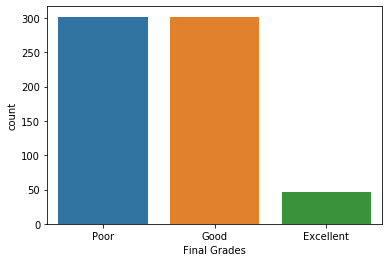

In [11]:
# Plotting the count of the tpes of Final Grades
sns.countplot(data['Final Grades'],order = ['Poor','Good','Excellent'])

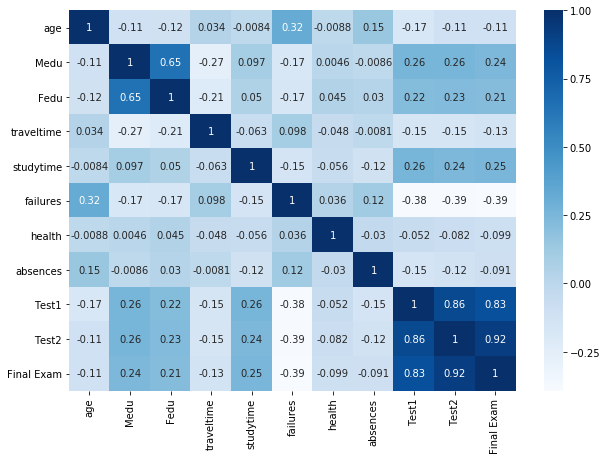

In [14]:
#Plotting the Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize = (10,7))
sns.heatmap(correlation_matrix,annot = True, cmap = "Blues")
plt.show()

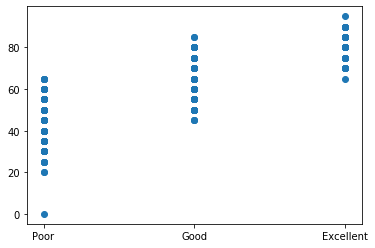

In [23]:
# Graph plotting Performance of Student in test1 and the final Grades obtained by them.
plt.scatter(data['Final Grades'],data['Test1'])

In [33]:
# Divide the columns in the dataset to features(x) and target(y) Variables.
x = data.iloc[:,:-2]
y = data.iloc[:,-1]
x = pd.get_dummies(x)
x.head()


,age,Medu,Fedu,traveltime,studytime,failures,health,absences,Test1,Test2,...,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other,extra-curricular activities_no,extra-curricular activities_yes
0,18,4,4,2,2,0,3,4,0,55,...,0,0,0,0,1,0,1,0,1,0
1,17,1,1,1,2,0,3,2,45,55,...,0,0,1,0,0,1,0,0,1,0
2,15,1,1,1,2,0,3,6,60,65,...,0,0,1,0,0,0,1,0,1,0
3,15,4,2,1,3,0,5,0,70,70,...,0,0,0,1,0,0,1,0,0,1
4,16,3,3,1,2,0,5,0,55,65,...,0,0,1,0,0,1,0,0,1,0


In [34]:
# Importing required packages for ML predictions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [69]:
# A Function to train and test the ML Model and return its score.
def Classifier(models):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)
    model = models
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    return model.score(x_test,y_test)


In [70]:
# Evaluating Model on Decison tree Classifier
tree_score = []
for i in range(1,101):
    tree = DecisionTreeClassifier(min_samples_leaf = i)
    tree_score.append(Classifier(tree))
    
print("Maximum efficiency for decision tree is : ",max(tree_score))
print("Value of min_samples_leaf for max value is : ",tree_score.index(max(tree_score))+1)

Maximum efficiency for decision tree is :  0.9202453987730062
Value of min_samples_leaf for max value is :  18


In [71]:
# Evaluating Model on Random Forest Classifier
forest_score = []
for i in range(1,101):
    forest = RandomForestClassifier(n_estimators = i)
    forest_score.append(Classifier(forest))
print("Maximum percentage for Random Forest Classifier is : ",max(forest_score))
print("Value of n_estimators for max value is : ",forest_score.index(max(forest_score))+1)

Maximum percentage for Random Forest Classifier is :  0.9386503067484663
Value of n_estimators for max value is :  85


In [72]:
# Evaluating Model on SVM Classifier
svm_score = []
for i in range(1,101):
    svm_model = SVC(gamma = "auto",kernel = 'rbf',probability = True,C =i )
    svm_score.append(Classifier(svm_model))
print("Maximum efficiency for SVM is : ",max(svm_score))
print("Value of C for max value is : ",svm_score.index(max(svm_score))+1)
    

Maximum efficiency for SVM is :  0.8650306748466258
Value of C for max value is :  1


In [73]:
# Evaluating Model on Naive Bayes Classifier
nb = GaussianNB()
nb_score = Classifier(nb)
print("Efficiency for Gaussian NB is : ",nb_score)

Efficiency for Gaussian NB is :  0.6380368098159509


In [74]:
# Evaluating Model on KNN Classifier
knn_score = []
for i in range(1,101):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn_score.append(Classifier(knn))
print("Maximum efficiency for KNN is : ",max(knn_score))
print("Value of n_neighbors for max value is : ",knn_score.index(max(knn_score))+1)
    

Maximum efficiency for KNN is :  0.9141104294478528
Value of n_neighbors for max value is :  43


In [ ]:
# From the above performed Experiments it is clear that Random Forest CLassifier having value of n_estimators  = 85 gives best results for our dataset.